In [1]:
%run utilities.ipynb 
load_standard_packages()
change_wordir()
import itertools as it
from tqdm import tqdm

Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.58.0


In [2]:
analysis = "pfd_dynamics"

colors, colours = colourblind_palette("own")

#model = "cyclic_2021"
#model = "new_PSI"
#model = "new_PSII"
#model = "new_b6f"
model = "latest_dev"

m = load_model(model)


succesfully loaded latest_dev :D


In [3]:
y0 = get_stst_y0(m, pfd=800)

s = Simulator(m)
s.initialise(y0)

In [4]:
def simulate_change(s, y0, param, value1, value2, t_to_0, t_after_0):
    """
    Simulate a change in a parameter from value1 to value2, starting at 0. Change appears at "t_to_0".
    """
    #get steady state
    s.update_parameter(param, value1)
    s.initialise(y0)
    s.simulate_to_steady_state()
    y1 = s.get_new_y0()
    if y1 is None:
        # throw error if steady state not reached
        raise ValueError("Modelbase says NO")

    # include some seconds before change
    s.initialise(y1)
    s.simulate(t_to_0)

    # simulate change
    s.update_parameter(param, value2)
    s.simulate(t_after_0)
    
    return None

# dark to light

In [5]:
# DARK TO LIGHT TRANSITION

pfd_dark = 30
pfd_light = 1000
t_to_0 = 5
t_after_0 = 100
#t_borders = [0, 100]
t_borders = [4.998, 5.008]
t_dark = [0, 5]

simulate_change(s, y0, "pfd", pfd_dark, pfd_light, t_to_0, t_after_0)

c = s.get_full_results_df()

In [6]:
c = checkpoint("c", dir = f"{model}/{analysis}", filename = "c_dark_to_light")

Saved: data/latest_dev/pfd_dynamics\c_dark_to_light.joblib


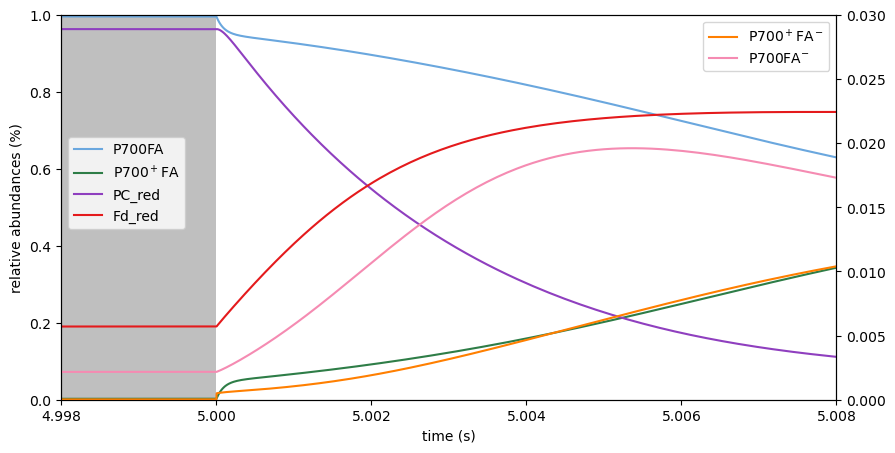

In [12]:
# PLOT PSI STATES

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(c["rel_P700FA"], label="P700FA", color=colors[0])
ax2.plot(c["rel_P700+FA-"], label="P700$^+$FA$^-$", color=colors[1])
ax1.plot(c["rel_P700+FA"], label="P700$^+$FA", color =colors[2])

if model != "cyclic_2021":
    ax2.plot(c["rel_P700FA-"], label = "P700FA$^{-}$", color=colors[3])

ax1.plot(c["PC_redoxstate"], label="PC_red", color=colors[4])
ax1.plot(c["Fd_redoxstate"], label="Fd_red", color=colors[5])

ax1.axvspan(t_dark[0], t_dark[1], facecolor='grey', alpha=0.5)

ax1.set(xlim=t_borders,
        ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%)"))
ax2.set(ylim=(-0.0, 0.03)
    )

#legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 0.7))
ax2.legend(loc = "upper right", bbox_to_anchor=(1, 1))


In [8]:
folder = f"figures/{model}/pfd_dynamics/"
zoom = ""
zoom = "_zoom_into_instant"

save_fig(fig, model, analysis, f"PSI_dark_light_{pfd_dark}_{pfd_light}{zoom}")

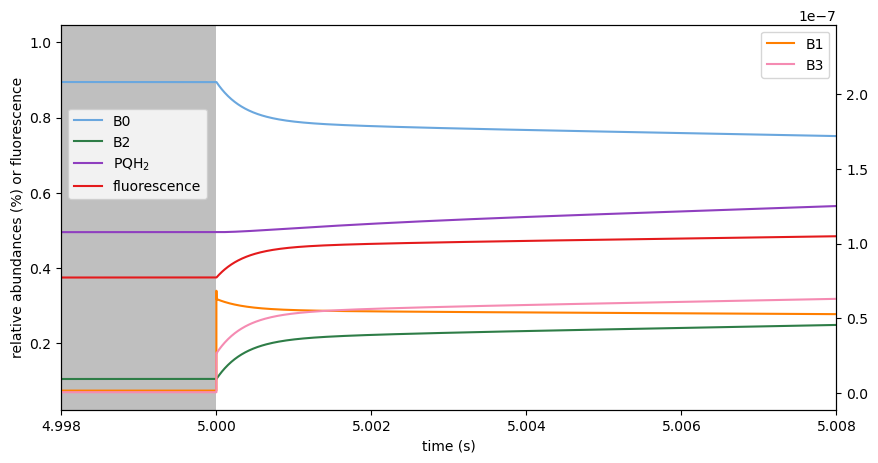

In [13]:
# PLOT PSII STATES

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(c["rel_B0"], label="B0", color=colors[0])
ax2.plot(c["rel_B1"], label="B1", color=colors[1])
ax1.plot(c["rel_B2"], label="B2", color=colors[2])
ax2.plot(c["rel_B3"], label="B3", color=colors[3])

ax1.plot(c["PQ_redoxstate"], label="PQH$_2$", color=colors[4])
ax1.plot(c["Fluo"]/max(c["Fluo"]), label="fluorescence", color=colors[5])

ax1.axvspan(t_dark[0], t_dark[1], facecolor='grey', alpha=0.5)

ax1.set(xlim=t_borders,
        #ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%) or fluorescence"))
ax2.set()

#legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 0.8))
ax2.legend(loc = "upper right", bbox_to_anchor=(1, 1))

In [8]:
folder = f"figures/{model}/pfd_dynamics/"
zoom = ""
zoom = "_zoom_into_instant"

save_fig(fig, model, analysis, f"PSII_dark_light_{pfd_dark}_{pfd_light}{zoom}")

# light to dark

In [14]:
# analysing light to dark transition

pfd_dark = 30
pfd_light = 1000
t_to_0 = 5
t_after_0 = 100
#t_borders = [0, 100]
t_borders = [4.998, 5.008]
t_dark = [5, 100]

simulate_change(s, y0, "pfd", pfd_light, pfd_dark, t_to_0, t_after_0)

c = s.get_full_results_df()


In [7]:
c = checkpoint("c", dir = f"{model}/{analysis}", filename = "c_light_to_dark")

Saved: data/latest_dev/pfd_dynamics\c_light_to_dark.joblib


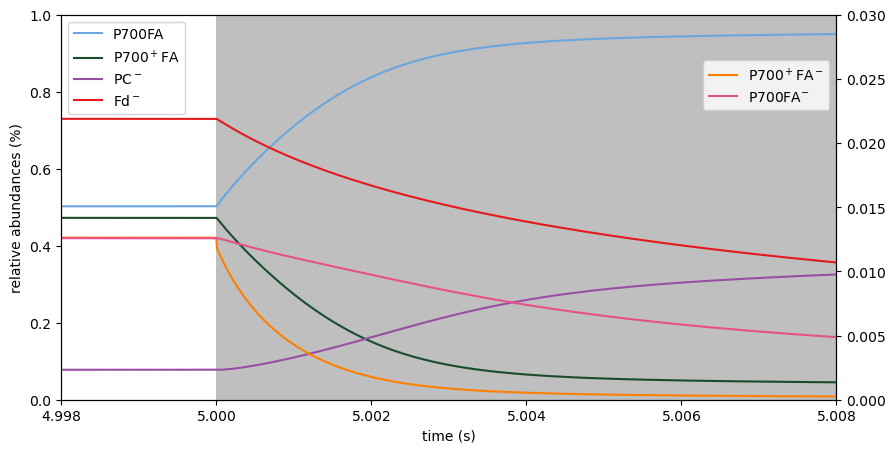

In [11]:
# PLOT PSI STATES

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(c["rel_P700FA"], label="P700FA", color=colors[0])
ax2.plot(c["rel_P700+FA-"], label="P700$^+$FA$^-$", color=colors[1])
ax1.plot(c["rel_P700+FA"], label="P700$^+$FA", color =colors[2])

if model != "cyclic_2021":
    ax2.plot(c["rel_P700FA-"], label = "P700FA$^{-}$", color=colors[3])

ax1.plot(c["PC_redoxstate"], label="PC$^-$", color=colors[4])
ax1.plot(c["Fd_redoxstate"], label="Fd$^-$", color=colors[5])

ax1.axvspan(t_dark[0], t_dark[1], facecolor='grey', alpha=0.5)

ax1.set(xlim=t_borders,
        ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%)"))
ax2.set(ylim=(-0.0, 0.03)),

#legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 1))
ax2.legend(loc = "upper right", bbox_to_anchor=(1, 0.9))

In [11]:
folder = f"figures/{model}/pfd_dynamics/"
zoom = ""
zoom = "_zoom_into_instant"

save_fig(fig, model, analysis, f"PSI_light_dark_{pfd_dark}_{pfd_light}{zoom}")

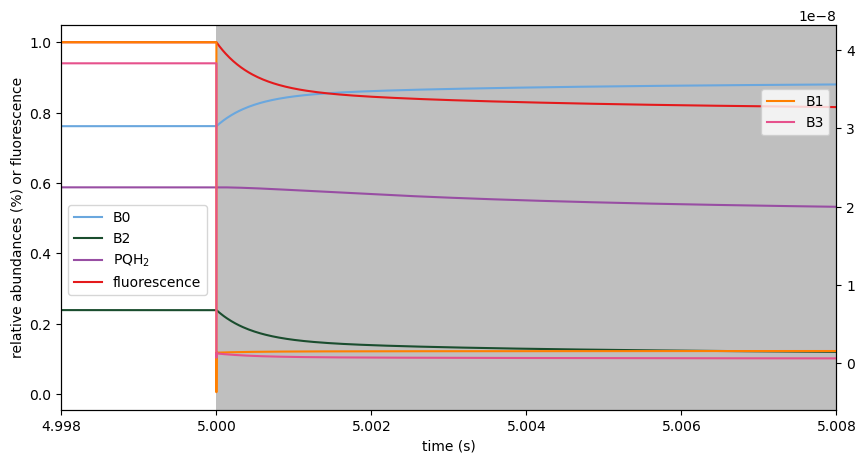

In [9]:
# PLOT PSII STATES

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(c["rel_B0"], label="B0", color=colors[0])
ax2.plot(c["rel_B1"], label="B1", color=colors[1])
ax1.plot(c["rel_B2"], label="B2", color=colors[2])
ax2.plot(c["rel_B3"], label="B3", color=colors[3])

ax1.plot(c["PQ_redoxstate"], label="PQH$_2$", color=colors[4])
ax1.plot(c["Fluo"]/max(c["Fluo"]), label="fluorescence", color=colors[5])

ax1.axvspan(t_dark[0], t_dark[1], facecolor='grey', alpha=0.5)

ax1.set(xlim=t_borders,
        #ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%) or fluorescence"))

#legends
ax1.legend(loc="upper left", bbox_to_anchor=(0, 0.55))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))

In [13]:
save_fig(fig, model, analysis, f"PSII_light_dark_{pfd_dark}_{pfd_light}{zoom}")

# compare different models

In [57]:
c_orig = checkpoint("c_orig", f"cyclic_2021/{analysis}", filename="c_dark_to_light")

c_PSI = checkpoint("c_PSI", f"new_PSI/{analysis}", filename="c_dark_to_light")

c_new_PSs = checkpoint("c_new_PSs", f"new_PSII/{analysis}", filename="c_dark_to_light")

c_latest = checkpoint("c_latest", f"latest_dev/{analysis}", filename="c_dark_to_light")

Loaded: data/new_PSII/pfd_dynamics\c_dark_to_light.joblib


In [8]:
#del var_name

In [58]:
models = {
        #"orig": [((0, (0.5, 2))), 2],
        "orig": ["-", 1],
        # "PSI": ["--", 1],
        "new_PSs": ["--", 1],
        #"latest": [":", 1]
        }

[(-0.0, 0.03)]

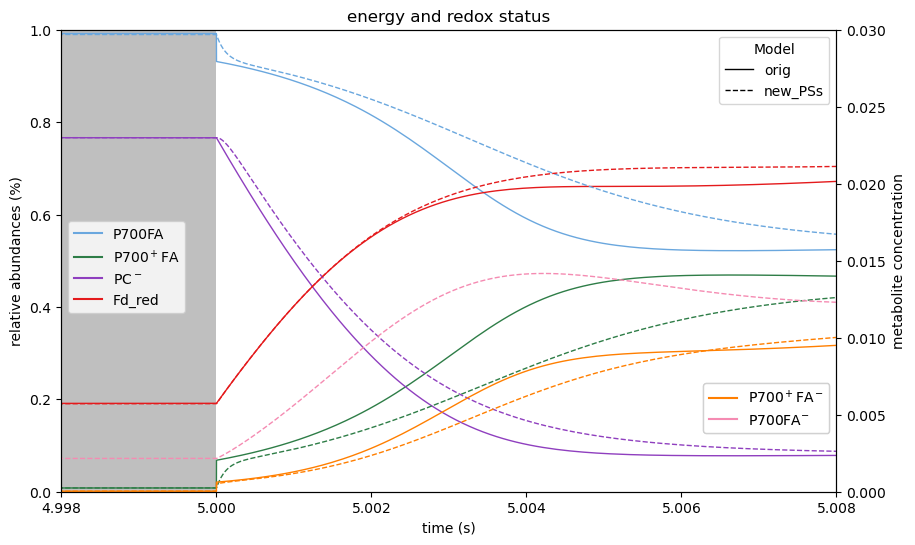

In [61]:
# ELECTRON CARRIERS

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
ax2 = ax1.twinx()

model_handles = []

for model_name, (style, width) in models.items():
        c_model = locals()[f"c_{model_name}"]  # Use locals() to access the variable by name
        ax1.plot(c_model["rel_P700FA"], label="P700FA", color=colors[0], linestyle=style, linewidth=width)
        ax2.plot(c_model["rel_P700+FA-"], label="P700$^+$FA$^-$", color=colors[1], linestyle=style, linewidth=width)
        ax1.plot(c_model["rel_P700+FA"], label="P700$^+$FA", color =colors[2], linestyle=style, linewidth=width)

        if model_name != "orig":
                ax2.plot(c_model["rel_P700FA-"], label = "P700FA$^{-}$", color=colors[3], linestyle=style, linewidth=width)

        ax1.plot(c_model["PC_redoxstate"], label="PC_red", color=colors[4], linestyle=style, linewidth=width)
        ax1.plot(c_model["Fd_redoxstate"], label="Fd_red", color=colors[5], linestyle=style, linewidth=width)

        model_handles.append(Line2D([0], [0], color='black', linestyle=style, lw=width, label=model_name))

# Set labels and legends
ax1.set(title="energy and redox status",
        xlabel="PFD",
        ylabel="fraction of total pool")
ax2.set_ylabel("metabolite concentration")

# Legends

metabolite_handles1 = [
        Line2D([0], [0], label="P700FA", color=colors[0]),
        Line2D([0], [0], label="P700$^+$FA", color=colors[2]),
        Line2D([0], [0], label="PC$^-$", color=colors[4]),
        Line2D([0], [0], label="Fd_red", color=colors[5])
]
metabolite_handles2 = [
        Line2D([0], [0], label="P700$^+$FA$^-$", color=colors[1]),
        Line2D([0], [0], label="P700FA$^{-}$", color=colors[3])
]

legend1 = ax1.legend(handles=metabolite_handles1, loc="upper left",  bbox_to_anchor=(0.0, .6))
legend2 = ax2.legend(handles=metabolite_handles2, loc="upper right", bbox_to_anchor=(1, 0.25))
legend3 = ax1.legend(handles=model_handles,       title="Model")
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.legend(handles=model_handles, title="Model", loc="upper right", bbox_to_anchor=(1, 1))

ax1.axvspan(t_dark[0], t_dark[1], facecolor='grey', alpha=0.5)

ax1.set(xlim=t_borders,
        ylim=(-0.00, 1),
        xlabel=("time (s)"),
        ylabel=("relative abundances (%)"))
ax2.set(ylim=(-0.0, 0.03)
)

# ax1.legend(loc="upper left", bbox_to_anchor=(0.06, 1))
# ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.2))

[(-0.0, 8e-08), Text(0, 0.5, ''), Text(0.5, 0, 'time (s)')]

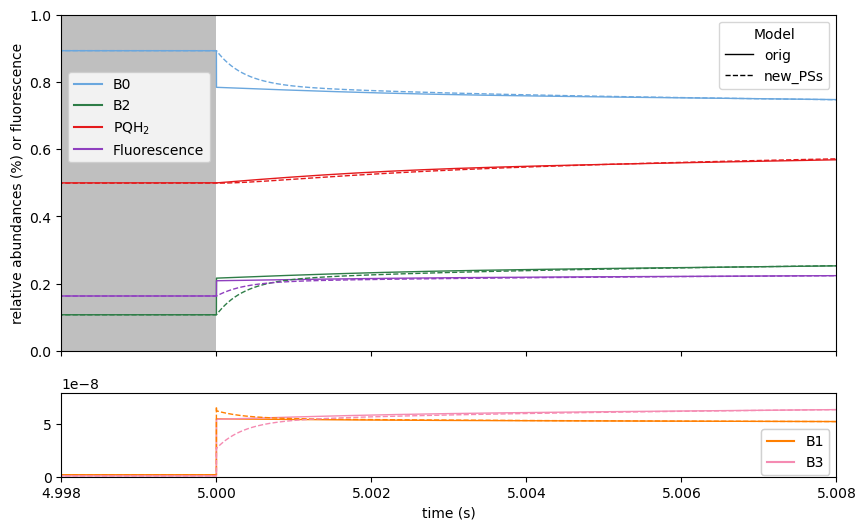

In [62]:
# ELECTRON CARRIERS

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True,  gridspec_kw={'height_ratios': [0.8, 0.2]})

model_handles = []

for model_name, (style, width) in models.items():
        c_model = locals()[f"c_{model_name}"]  # Use locals() to access the variable by name
        ax1.plot(c_model["rel_B0"], label="B0", color=colors[0], linestyle=style, linewidth=width)
        ax2.plot(c_model["rel_B1"], label="B1", color=colors[1], linestyle=style, linewidth=width)
        ax1.plot(c_model["rel_B2"], label="B2", color =colors[2], linestyle=style, linewidth=width)
        ax2.plot(c_model["rel_B3"], label = "B3", color=colors[3], linestyle=style, linewidth=width)

        ax1.plot(c_model["Fluo"], label="Fluorescence", color=colors[4], linestyle=style, linewidth=width)
        ax1.plot(c_model["PQ_redoxstate"], label="PGH$_2$", color=colors[5], linestyle=style, linewidth=width)

        model_handles.append(Line2D([0], [0], color='black', linestyle=style, lw=width, label=model_name))

# Legends

metabolite_handles1 = [
        Line2D([0], [0], label="B0", color=colors[0]),
        Line2D([0], [0], label="B2", color=colors[2]),
        Line2D([0], [0], label="PQH$_2$", color=colors[5]),
        Line2D([0], [0], label="Fluorescence", color=colors[4])
]
metabolite_handles2 = [
        Line2D([0], [0], label="B1", color=colors[1]),
        Line2D([0], [0], label="B3", color=colors[3])
]

legend1 = ax1.legend(handles=metabolite_handles1, loc="upper left",  bbox_to_anchor=(0.0, .85))
legend2 = ax2.legend(handles=metabolite_handles2, loc="upper right", bbox_to_anchor=(1, 0.65))
legend3 = ax1.legend(handles=model_handles,       title="Model")
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.legend(handles=model_handles, title="Model", loc="upper right", bbox_to_anchor=(1, 1))

ax1.axvspan(t_dark[0], t_dark[1], facecolor='grey', alpha=0.5)

ax1.set(xlim=t_borders,
        ylim=(-0.00, 1),
        ylabel=("relative abundances (%) or fluorescence"))
ax2.set(ylim=(-0.0, 0.00000008),
        ylabel=(""),
        xlabel=("time (s)")
)

# ax1.legend(loc="upper left", bbox_to_anchor=(0.06, 1))
# ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.2))